In [1]:
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
from simulator.map_utils import create_regions
import matplotlib.pyplot as plt
import numpy as np

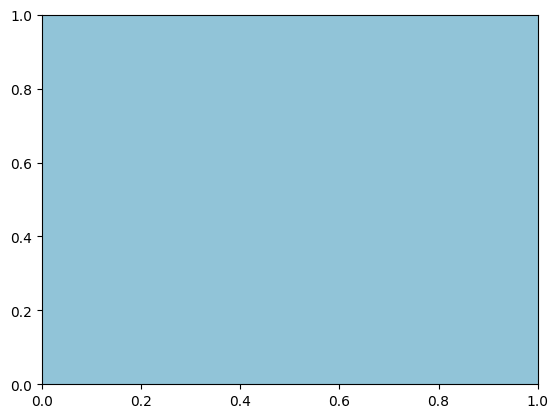

In [3]:

# Lista de celdas (x_km, y_km, p_tx)
celdas = [
    (12.5, 8.0, 40),
    (15.0, 10.0, 0.1),
    (13.5, 9.5, 0.1)
]

fig, ax = plt.subplots()

regions = create_regions(3, np.array(celdas), ax, 2, {}, None)

In [4]:
regions

{2: <POLYGON ((13.592 9.492, 13.591 9.487, 13.59 9.481, 13.588 9.476, 13.587 9.4...>,
 1: <POLYGON ((15.166 9.995, 15.165 9.985, 15.164 9.975, 15.162 9.965, 15.159 9....>,
 0: <POLYGON ((1000 1000, 1000 0, 0 0, 0 1000, 1000 1000), (13.593 9.504, 13.593...>}

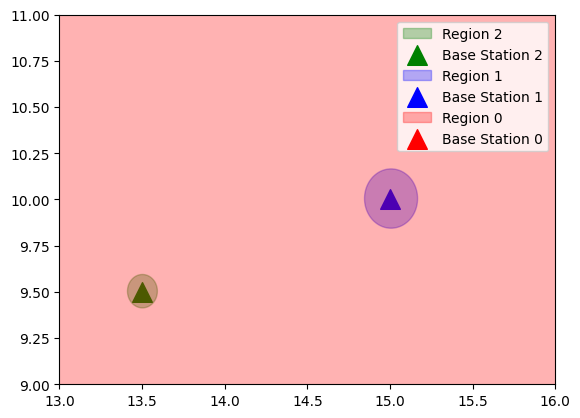

In [19]:
# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, color=colors[i], label=f'Region {i}')
        
    # Add the base stations to the plot
    ax.scatter(celdas[i][0], celdas[i][1], color=colors[i], label=f'Base Station {i}', marker='^', s=200)
    
ax.set_xlim(13, 16)
ax.set_ylim(9, 11)
ax.legend()
plt.show()
